# Data Analysis and Map-Reduce with MongoDB and pymongo

Alexander Hendorf (@opotoc), MongoDB Days Germany 2015 Munich, MongoDB Days 2015 Silicon Valley San José, PySS15 Ibaeta University San Sebastián, EuroPython 2015 Bilbao

The dataset only contains the data for the two artists (207 playlists)

In [1]:
from IPython.display import HTML, Audio
from IPython.display import Image
import pymongo
import datetime
from pymongo import ASCENDING, DESCENDING
from bson.son import SON
from pprint import pprint
import json
from config import *

import pymongo driver, bson, json, some config parameters (e.g. database access) & 
make database connection

In [2]:
# make sure the database is running (start.sh)!
db = pymongo.MongoClient("localhost:27017")['db']
playlists = 'playlists'

our dataset

In [3]:
count = db[playlists].count()
HTML('<p style="height:30px"></p><p style="font-size: 36px">{:,} playlists found.</p><p style="height:10px"></p>'.format(count))

# Map Reduce

In [4]:
from bson.code import Code
# bson.code is just a tool for representing JavaScript code in BSON

#### Map Function

In [5]:
mapper = Code("""
               function () {
                   var artist = this.info.artistName; 
                   if (artist.length < 100){
                       // avoid indexing error in output collection
                       emit(artist, 1);
                   }
               }
               """)

#### Reduce Function

In [6]:
reducer = Code("""
                function (key, values) {
                  var total = 0;
                  for (var i = 0; i < values.length; i++) {
                    total += values[i];
                  }
                  return total;
                }
                """)

#### send output to a collection: "results_collection"
measuring the excecution time and playing a scientific sound when finished

In [7]:
start = datetime.datetime.now()
#
result = db[playlists].map_reduce(mapper, reducer, "results_collection")
# fallback: limit query to a company
#result = db[playlists].map_reduce(mapper, reducer, "results_collection", query={'info.copyrightIndex': 'MOTOWN'})
#
print("mape reduce done, took: {}".format(datetime.datetime.now() - start))
print("found {0:,} artists".format(db['results_collection'].count()))
# audio-signal when done
Audio("http://www.trekcore.com/audio/communicator/ent_communicator1.mp3", autoplay=True)

mape reduce done, took: 0:00:00.158125
found 2 artists


In [8]:
# <<<<








#

# Aggregation Framework

In [9]:
query = {"info.artistName": artist}
count = db[playlists].count(query)
print("found {:,} releases for {}".format(count, artist))

found 93 releases for Taylor Swift


### \$match \$project

In [10]:
pipeline = [
    {"$match": {"info.artistName": artist}},
    {"$project": {"release": "$info.name", "_id": 0}},
]

In [11]:
res = db[playlists].aggregate(pipeline)
print("\n found {} document\n".format(len(list(res))))


 found 93 document



[]


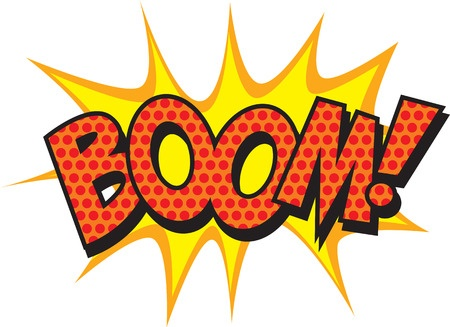

In [12]:
# let's hav a look at our dataset
print(list(res))
#
Image(filename='pic/boom.jpg')

In [13]:
cursor = db[playlists].aggregate(pipeline)
print(list(cursor))

[{'release': 'Fearless (Platinum Edition)'}, {'release': 'Speak Now'}, {'release': 'Fearless'}, {'release': 'Fearless'}, {'release': 'Red'}, {'release': 'Speak Now - World Tour Live'}, {'release': 'Safe & Sound (From "The Hunger Games" Soundtrack) [feat. The Civil Wars] - Single'}, {'release': 'Fearless (Platinum Edition)'}, {'release': 'Fearless (Bonus Track Version)'}, {'release': 'Love Story (Stripped) - Single'}, {'release': 'Speak Now: World Tour Live'}, {'release': 'Fearless (Platinum Edition) [Audio Version]'}, {'release': 'Live From SoHo (iTunes exclusive)'}, {'release': 'Sweeter Than Fiction (From "One Chance") - Single'}, {'release': 'The Taylor Swift Holiday Collection - Single'}, {'release': 'Red (feat. Alison Krauss, Edgar Meyer, Eric Darken, Sam Bush & Vince Gill) [Live At the CMA Awards / 2013] - Single'}, {'release': 'The Taylor Swift Holiday Collection - EP'}, {'release': 'The Taylor Swift Holiday Collection - EP'}, {'release': 'Mine - Single'}, {'release': 'Speak Now 

In [14]:
cursor = db[playlists].aggregate(pipeline)
# output as HTML table
table = ListTable()
table.title = "releases of {}".format(artist)
table.append(['position', 'release'])
for i, l in enumerate(cursor, 1):
    table.append([i, l['release']])
table

position,release
1,Fearless (Platinum Edition)
2,Speak Now
3,Fearless
4,Fearless
5,Red
6,Speak Now - World Tour Live
7,"Safe & Sound (From ""The Hunger Games"" Soundtrack) [feat. The Civil Wars] - Single"
8,Fearless (Platinum Edition)
9,Fearless (Bonus Track Version)
10,Love Story (Stripped) - Single


In [15]:
# <<<<








#

###  $group

In [16]:
pipeline = [
    {"$match": {"info.artistName": artist}},
    
    {"$group": {
       "_id": "$info.name",
       "count": {"$sum": 1}}},
   
    {"$project": {"release": "$_id", "_id": 0, "count": 1}},
    {"$sort": {"release": ASCENDING}}
]

In [17]:
cursor = db[playlists].aggregate(pipeline)
table2 = ListTable()
table2.title = "duplicate releases of {}".format(artist)
table2.append(['count', 'release'])
for l in cursor:
    table2.append([l.get('count'), l.get('release')])
table2

count,release
4,1989
1,1989 (Deluxe Edition)
3,1989 (Deluxe)
1,Back to December - Single
2,Bad Blood (feat. Kendrick Lamar) - Single
2,Everything Has Changed (Remix) [feat. Ed Sheeran] - Single
4,Fearless
2,Fearless (Bonus Track Version)
1,Fearless (Deluxe Version)
1,Fearless (Japan Digital Version)


###  \$group - \$sort -  \$limit

In [18]:
pipeline = [
    {"$match": {"info.artistName": artist}},
    {"$group": {
        "_id": "$info.name",
        "count": {"$sum": 1}
    }},
    {"$project": {"release": "$_id", "count": 1, "_id": 0}},
    
#   {"$sort": {"count": DESCENDING, "release": ASCENDING}},
    {"$sort": {"release": ASCENDING, "count": DESCENDING}},

    {"$limit": 10},
    
]

In [19]:
cursor = db[playlists].aggregate(pipeline)
table3 = ListTable()
table3.title = "top duplicate releases of {}".format(artist)
table3.append(['count', 'release'])
for l in cursor:
    table3.append([l.get('count'), l.get('release')])
table3

count,release
4,1989
1,1989 (Deluxe Edition)
3,1989 (Deluxe)
1,Back to December - Single
2,Bad Blood (feat. Kendrick Lamar) - Single
2,Everything Has Changed (Remix) [feat. Ed Sheeran] - Single
4,Fearless
2,Fearless (Bonus Track Version)
1,Fearless (Deluxe Version)
1,Fearless (Japan Digital Version)


#### mind the sort datatype

In [20]:
pipeline = [
    {"$match": {"info.artistName": artist}},
    {"$group": {
        "_id": "$info.name",
        "count": {"$sum": 1}
    }},
    {"$project": {"release": "$_id", "count": "$count", "_id": 0}},
    # caveat sort order: use collections.OrderDict or bson.SON!
   {"$sort": SON([("release", ASCENDING),("count", DESCENDING)])},
#    {"$sort": SON([("count", DESCENDING), ("release", ASCENDING)])},

    {"$limit": 10},
]

In [21]:
cursor = db[playlists].aggregate(pipeline)
table3 = ListTable()
table3.title = "top duplicate releases of {}".format(artist)
table3.append(['count', 'release'])
for l in cursor:
    table3.append([l.get('count'), l.get('release')])
table3

count,release
4,1989
1,1989 (Deluxe Edition)
3,1989 (Deluxe)
1,Back to December - Single
2,Bad Blood (feat. Kendrick Lamar) - Single
2,Everything Has Changed (Remix) [feat. Ed Sheeran] - Single
4,Fearless
2,Fearless (Bonus Track Version)
1,Fearless (Deluxe Version)
1,Fearless (Japan Digital Version)


In [22]:
# <<<<








#

### $unwind

In [23]:
# aggregate information in subdocuments
# get all the songs
pipeline = [
    {"$match": {"info.artistName": artist}},
    
    
    {"$unwind": "$info.children"},
    
    
    {"$group": {
        "_id": "$info.children.name"
    }},
    {"$project": {"song": "$_id", "_id": 0}},
    {"$sort": SON([("song", ASCENDING)])},
]

In [24]:
cursor = db[playlists].aggregate(pipeline)
table3 = ListTable()
table3.title = "songs of {}".format(artist)
table3.append(['position', 'release'])
for i, l in enumerate(cursor, 1):
    table3.append([i, l.get('song')])
table3

position,release
1,22
2,22 (Karaoke Version)
3,A Perfectly Good Heart
4,A Perfectly Good Heart (Karaoke Version)
5,A Place In This World
6,A Place In This World (Karaoke Version)
7,A Place In This World (Live)
8,A Place In This World (iTunes Live from SoHo)
9,All Too Well
10,All Too Well (Karaoke Version)


#### inner mechanics of $unwind

In [25]:
pipeline = [
    {"$match": {"info.artistName": artist}},
    {"$limit": 1},
    {"$unwind": "$info.children"},
    {"$project": {"adamId": 1, "info.name": 1, "info.children.name": 1, "_id": 0}}
]

In [26]:
cursor = db[playlists].aggregate(pipeline)
r = list(cursor)
pprint(r)
print("found {:,} documents".format(len(r)))

[{'adamId': 338158385,
  'info': {'children': {'name': 'Jump Then Fall'},
           'name': 'Fearless (Platinum Edition)'}},
 {'adamId': 338158385,
  'info': {'children': {'name': 'Untouchable'},
           'name': 'Fearless (Platinum Edition)'}},
 {'adamId': 338158385,
  'info': {'children': {'name': 'Forever & Always (Piano Version)'},
           'name': 'Fearless (Platinum Edition)'}},
 {'adamId': 338158385,
  'info': {'children': {'name': 'Come In With the Rain'},
           'name': 'Fearless (Platinum Edition)'}},
 {'adamId': 338158385,
  'info': {'children': {'name': 'SuperStar'},
           'name': 'Fearless (Platinum Edition)'}},
 {'adamId': 338158385,
  'info': {'children': {'name': 'The Other Side of the Door'},
           'name': 'Fearless (Platinum Edition)'}},
 {'adamId': 338158385,
  'info': {'children': {'name': 'Fearless'},
           'name': 'Fearless (Platinum Edition)'}},
 {'adamId': 338158385,
  'info': {'children': {'name': 'Fifteen'},
           'name': 'Fearless

In [27]:
# <<<<








#

## Accumlators

### \$min & \$max

In [28]:
pipeline = [
    {"$match": {"info.artistName": artist}},
    
    
    {"$group": {
        "_id": '',
        "minDate": {"$min": "$info.releaseDateEpoch"},
        "maxDate": {"$max": "$info.releaseDateEpoch"}
    }},
    
    
    {"$project": {"_id": 0, "minDate": 1, "maxDate": 1}}
]

In [29]:
cursor = db[playlists].aggregate(pipeline)
print("release period of {}".format(artist))
pprint(list(cursor))

release period of Taylor Swift
[{'maxDate': datetime.datetime(2015, 5, 18, 0, 0),
  'minDate': datetime.datetime(2006, 10, 24, 0, 0)}]


### \$first & \$last

Returns the value that results from applying an **expression** to the first document in a group of documents that share the same group by key.

In [30]:
pipeline = [
    {"$match": {"info.artistName": artist}},
    
    {"$sort": SON([("info.releaseDate", ASCENDING)])},  
    {"$group": {
        "_id": "",
        "minDate": {"$first": "$info.releaseDate"},
        "maxDate": {"$last": "$info.releaseDate"},
    }},
    
    
    {"$project": {"_id": 0, "minDate": 1, "maxDate": 1}}
]

In [31]:
cursor = db[playlists].aggregate(pipeline)
print("\n\nrelease period of {}".format(artist))
pprint(list(cursor))



release period of Taylor Swift
[{'maxDate': '2015-05-18', 'minDate': '2006-10-24'}]


In [32]:
pipeline = [
    {"$match": {"info.artistName": artist}},
    
    {"$sort": SON([("info.releaseDate", ASCENDING)])},  
    {"$group": {
        "_id": "",
        "minYear": {"$first": {"$year": "$info.releaseDateEpoch"}},
        "maxYear": {"$last":  {"$year": "$info.releaseDateEpoch"}},
    }},
    
    
    {"$project": {"_id": 0, "minYear": 1, "maxYear": 1}}
]

In [33]:
cursor = db[playlists].aggregate(pipeline)
print("release period of {}".format(artist))
pprint(list(cursor))

release period of Taylor Swift
[{'maxYear': 2015, 'minYear': 2006}]


##  Operators

### date operators

In [34]:
pipeline = [
    {"$match": {"info.artistName": artist}},
    
    
    {"$group": {
        "_id": {"$year": "$info.releaseDateEpoch"},
        "count": {"$sum": 1}
    }},
    
    
    {"$project": {"year": "$_id", "_id": 0, "count": 1}},
    {"$sort": SON([("year", DESCENDING)])}
]

In [35]:
cursor = db[playlists].aggregate(pipeline)
table4 = ListTable()
table4.title = "count of releases by year of {}".format(artist)
table4.append(['year', 'count'])
for l in cursor:
    table4.append([l.get('year'), l.get('count')])
table4

year,count
2015,11
2014,10
2013,9
2012,11
2011,9
2010,12
2009,19
2008,5
2007,4
2006,3


In [36]:
pipeline = [
    {"$match": {"info.artistName": artist}},
    
    
    {"$group": {
        "_id": {"year": {"$year": "$info.releaseDateEpoch"},
               "month": {"$month": "$info.releaseDateEpoch"}},
        "count": {"$sum": 1}
    }},
    
    
    {"$project": {"year": "$_id.year","month": "$_id.month", "_id": 0, "count": 1}},
    {"$sort": SON([("year", DESCENDING), ("month", DESCENDING)])}
]

In [37]:
cursor = db[playlists].aggregate(pipeline)
table5 = ListTable()
table5.title = "count of releases by month/year of {}".format(artist)
table5.append(['year', 'month', 'count'])
for l in cursor:
    table5.append([l.get('year'), l.get('month'), l.get('count')])
table5

year,month,count
2015,5,2
2015,3,4
2015,2,4
2015,1,1
2014,12,1
2014,10,8
2014,1,1
2013,11,2
2013,10,3
2013,7,2


In [38]:
# <<<<








#

# -

### $in

In [39]:
nemesis = "Katy Perry"  # arch enemy

In [40]:
pipeline = [
    {"$match": {"info.artistName": {"$in": [artist, nemesis]}}},
    {"$unwind": "$info.children"},
    {"$group": {
        "_id": {"artist": '$info.artistName', "song": "$info.children.name"},
        "minDate": {"$min": "$info.releaseDateEpoch"},
        "maxDate": {"$max": "$info.releaseDateEpoch"},
    }},
    # artist
    {"$group": {"_id": "$_id.artist",
                "minDate": {"$min": "$minDate"},
                "maxDate": {"$max": "$maxDate"},
                "songCount": {"$sum": 1}
                }},
    # just renaming attributes
    {"$project": {"maxDate": 1, "minDate": 1, "releaseCount": 1, "songCount": 1,
                  "artist": "$_id", "_id": 0}}
]

In [41]:
cursor = db[playlists].aggregate(pipeline)
print("\n\n active period")
pprint(list(cursor))



 active period
[{'artist': 'Katy Perry',
  'maxDate': datetime.datetime(2014, 8, 25, 0, 0),
  'minDate': datetime.datetime(2007, 11, 20, 0, 0),
  'songCount': 127},
 {'artist': 'Taylor Swift',
  'maxDate': datetime.datetime(2015, 5, 18, 0, 0),
  'minDate': datetime.datetime(2006, 10, 24, 0, 0),
  'songCount': 332}]


### $avg

In [42]:
pipeline = [
    
    {"$match": {"info.artistName": {"$in": [artist, nemesis]}}},
    
    {"$unwind": "$info.children"},
    {"$unwind": "$info.children.offers"},
    {"$unwind": "$info.children.offers.assets"},
    
    # some cleanup of outliers, don't worrry about it
    {"$match": {"info.children.offers.assets.duration": {"$gt": 30}}},
    {"$group": {"_id": "$info.artistName",
                "playtime": {"$avg": "$info.children.offers.assets.duration"},
                }},
    # just renaming attributes
    {"$project": {"artist": "$_id", "_id": 0,
                  "playtime": {"$subtract": ["$playtime", {"$mod": ["$playtime", 1]}]}}}
]

In [43]:
cursor = db[playlists].aggregate(pipeline)
print("\n\n average playtimes")
pprint(list(cursor))



 average playtimes
[{'artist': 'Taylor Swift', 'playtime': 268.0},
 {'artist': 'Katy Perry', 'playtime': 239.0}]


In [44]:
# <<<<








#

### string operations

In [45]:
pipeline = [
    {"$match": {"info.artistName": {"$in": [artist, nemesis]}}},
    {"$unwind": "$info.offers"},
    
    
    {"$project": {"info.offers.price": 1, "info.offers.priceFormatted": 1, 
                  "artist": "$info.artistName",
                  "product": "$info.name",
                  # isUSD compare if substring is usd
                  "isUSD": {"$cmp": [
                    {"$toLower": {"$substr": ["$info.offers.priceFormatted", 0, 3]}},
                    "usd"]
                           }}},
    # $cmp returns -1 / 0 / 1 less / equal / greater, $eq also possible
    {"$match": {"isUSD": 0}},
    
    
    {"$group": {
        "_id": {"artist": "$artist"},
        "releases": {"$push": {"price": "$info.offers.price", "product": "$product"}}
    }},
    {"$project": {"artist": "$_id.artist", "_id": 0, "releases": 1}}
]

In [46]:
cursor = db[playlists].aggregate(pipeline)
res = list(cursor)
table6 = ListTable()
table6.title = "pricing of releases"
table6.append(['artist', 'product', 'currency', 'price'])
for l in res:
    a = l.get('artist')
    for r in l.get('releases'): 
        table6.append([a, r.get('product')[:80], "$", r.get('price')])
        a  = ""
table6

artist,product,currency,price
Taylor Swift,Fearless (Platinum Edition),$,12.99
,Speak Now - World Tour Live,$,9.99
,Mine - Single,$,1.99
,Love Story (Remix Bundle) - Single,$,1.99
,Teardrops On My Guitar - EP,$,2.49
,You Belong With Me (Radio Mix) - Single,$,0.99
,Long Live (feat. Paula Fernandes) - Single,$,1.29
,We Are Never Ever Getting Back Together - Single,$,1.29
,Taylor Swift Karaoke: 1989,$,9.99
,Speak Now - Single,$,0.99


In [47]:
# <<<<








#

### $map

In [48]:
# first: look on the data array we use $map on
pipeline = [
    {"$match": {"info.artistName": {"$in": [artist, nemesis]}}},
    {"$unwind": "$info.offers"},  
    {"$project": {"info.offers.price": 1, "info.offers.priceFormatted": 1, 
                  "artist": "$info.artistName",
                  "product": "$info.name",
                  # isUSD compare if substring is usd
                  "isUSD": {"$cmp": [
                    {"$toLower": {"$substr": ["$info.offers.priceFormatted", 0, 3]}},
                    "usd"]}}},
    {"$match": {"isUSD": 0}},

    {"$group": {
        "_id": "$artist",
        "pricing": {"$push": "$info.offers.price"}
    }} 
]

In [49]:
cursor = db[playlists].aggregate(pipeline)
res = list(cursor)
for a in res:
    print(a['_id'])
    print(a['pricing'])

Taylor Swift
[12.99, 9.99, 1.99, 1.99, 2.49, 0.99, 1.29, 1.29, 9.99, 0.99]
Katy Perry
[1.29, 1.29, 2.49, 2.49, 1.29, 0.99, 10.99, 8.28, 1.29, 8.99, 2.99, 2.49, 1.29, 9.99, 0.99, 8.99, 0.69, 8.99, 2.49, 2.49, 2.49, 1.29, 0.69]


In [50]:
# exchange rate
eur_dollar_exchange_rate = 0.88

pipeline = [
    {"$match": {"info.artistName": {"$in": [artist, nemesis]}}},
    {"$unwind": "$info.offers"},  
    {"$project": {"info.offers.price": 1, "info.offers.priceFormatted": 1, 
                  "artist": "$info.artistName",
                  "product": "$info.name",
                  # isUSD compare if substring is usd
                  "isUSD": {"$cmp": [
                    {"$toLower": {"$substr": ["$info.offers.priceFormatted", 0, 3]}},
                    "usd"]}}},
    {"$match": {"isUSD": 0}},

    {"$group": {
        "_id": "$artist",
        "pricing": {"$push": "$info.offers.price"}
    }},
    {"$project": {
        "pricing": {"$map": {"input": "$pricing",
                                         "as": "value",
                                         "in": {"$multiply": ["$$value",
                                                         eur_dollar_exchange_rate
                                                         ]}}}}},
]

In [51]:
cursor = db[playlists].aggregate(pipeline)
res = list(cursor)
table7 = ListTable()
table7.title = "pricing of releases"
table7.append(['artist', 'currency', 'price'])
for l in res:
    a = l.get('_id')
    for r in l.get('pricing'): 
        table7.append([a, "€", round(r, 3)])
        a  = ""
table7

artist,currency,price
Taylor Swift,€,11.431
,€,8.791
,€,1.751
,€,1.751
,€,2.191
,€,0.871
,€,1.135
,€,1.135
,€,8.791
,€,0.871


In [52]:
server_version = db.client.server_info()
server_version

{'allocator': 'system',
 'bits': 64,
 'buildEnvironment': {'cc': '/usr/bin/clang: Apple LLVM version 7.0.2 (clang-700.1.81)',
  'ccflags': '-fno-omit-frame-pointer -fPIC -fno-strict-aliasing -ggdb -pthread -Wall -Wsign-compare -Wno-unknown-pragmas -Winvalid-pch -O2 -Wno-unused-local-typedefs -Wno-unused-function -Wno-unused-private-field -Wno-deprecated-declarations -Wno-tautological-constant-out-of-range-compare -Wno-unused-const-variable -Wno-missing-braces -Wno-inconsistent-missing-override -Wno-potentially-evaluated-expression -Wno-null-conversion -mmacosx-version-min=10.11 -fno-builtin-memcmp',
  'cxx': '/usr/bin/clang++: Apple LLVM version 7.0.2 (clang-700.1.81)',
  'cxxflags': '-Wnon-virtual-dtor -Woverloaded-virtual -std=c++11',
  'distarch': 'x86_64',
  'distmod': '',
  'linkflags': '-fPIC -pthread -Wl,-bind_at_load -mmacosx-version-min=10.11',
  'target_arch': 'x86_64',
  'target_os': 'osx'},
 'debug': False,
 'gitVersion': 'b326ba837cf6f49d65c2f85e1b70f6f31ece7937',
 'javasc

In [53]:
if server_version.get('versionArray')[0] == 3 and server_version.get('versionArray')[1] >= 2:
    pipeline = [
        {"$match": {"info.artistName": {"$in": [artist, nemesis]}}},
        {"$unwind": "$info.offers"},
        {"$project": {"info.offers.price": 1, "info.offers.priceFormatted": 1,
                      "artist": "$info.artistName",
                      "product": "$info.name",
                      "currency": {"$toUpper": {"$substr": ["$info.offers.priceFormatted", 0, 3]}}}},
        # get most current exchanges rate by $lookup
        {"$lookup": {
            "from": "exchangerates",  # collection to join
            "localField": "currency",  # field from the input documents
            "foreignField": "_id",  # field from the documents of the "from" collection
            "as": "exchangeRate"
        }},
        
        {"$match": {"exchangeRate": {"$size": 1}}},  # filter 

        {"$group": {
            "_id": {"artist": "$artist", "currency": "$currency"},
            "pricing": {"$push": "$info.offers.price"},
            "rate": {"$first": "$exchangeRate.rate"}}},        
        
        {"$project": {
                "_id": "$_id.artist", 
                "currency": "$_id.currency", 
                "pricing": {"$map": {"input": "$pricing",
                                         "as": "value",
                                         "in": {"$multiply": ["$$value",
                                                         {"$arrayElemAt": ["$rate", 0]}  # rate: [float], $unwind
                                                         ]}}} }}
    ]
else:
    print("This feature requires mongoDB 3.2+")

In [54]:
cursor = db[playlists].aggregate(pipeline)
res = list(cursor)
table8 = ListTable()
table8.title = "pricing of releases"
table8.append(['artist', 'currency', 'price'])
for l in res:
    a, c = l.get('_id'), l.get('currency')
    for r in l.get('pricing'): 
        table8.append([a, c, "{} EUR".format(round(r, 2))])
        a  = ""
table8

artist,currency,price
Taylor Swift,USD,14.76 EUR
,USD,11.35 EUR
,USD,2.26 EUR
,USD,2.26 EUR
,USD,2.83 EUR
,USD,1.12 EUR
,USD,1.47 EUR
,USD,1.47 EUR
,USD,11.35 EUR
,USD,1.12 EUR


In [55]:
# <<<<








#

## Map Reduce Most Popular Words

#### get the most common word in relase titles…

In [56]:
from bson.code import Code
mapper = Code("""
               function () {
                   var words = this.info.name.split(' '); 
                   for (i in words) {
                   var word = words[i].replace(/[^a-z0-9]/gi,"");
                   if (word.length > 0){
                   emit(word.toLowerCase(), 1);
                   }
                 };
               }
               """)

In [57]:
reducer = Code("""
                function (key, values) {
                  var total = 0;
                  for (var i = 0; i < values.length; i++) {
                    total += values[i];
                  }
                  return total;
                }
                """)

In [58]:
start = datetime.datetime.now()
result = db[playlists].map_reduce(mapper, reducer, "results")
#result = db.playlists.map_reduce(mapper, reducer, "results", query={"info.artistName": {"$in": [artist, nemesis]}})
#, query={"info.artistName": {"$in": [artist, nemesis]}}
print("mape reduce done, took: {}".format(datetime.datetime.now() - start))

mape reduce done, took: 0:00:00.132566


In [59]:
# print(result)

In [60]:
from operator import itemgetter
try:
    from nltk.corpus import stopwords 
    cachedStopWords = stopwords.words("english") + stopwords.words("spanish") + list([str(x) for x in range(10)])
except: 
    cachedStopWords = _stopwords
max, i = 50, 0

table8 = ListTable()
table8.title = "most popular words in album titles"
table8.append(['count', 'word'])    

for doc in sorted([x for x in result.find() if x.get('_id') not in cachedStopWords and x.get('_id') not in ["single", "ep", "vol", "feat"]], key=itemgetter('value'), reverse=True):
    i += 1
    table8.append([doc.get('value'), doc.get('_id')])
    if i >= max:
        break
table8

count,word
30.0,dream
30.0,teenage
24.0,one
23.0,version
21.0,deluxe
18.0,boys
16.0,1989
16.0,swift
16.0,taylor
14.0,fearless


In [61]:
# <<<< END








#

#### alternative: db.collection.group()

Uses JavaScript and is subject to a number of performance limitations, see docs for details.

In [62]:
reduce_f = "function (doc, out) {out.count++;}"
query = {"info.artistName": artist}
initial = {'count': 0}
key = ["info.artistName"]
res = db[playlists].group(
        key=key, 
        condition=query,
        initial=initial,
        reduce=reduce_f)
print(res)

[{'info.artistName': 'Taylor Swift', 'count': 93.0}]


#### bonus: first map reduce example with group() operator

In [63]:
start = datetime.datetime.now()
#
pipeline = [
    {"$group": {"_id": "$info.artistName"}},
    {"$group": {"_id": None, 'count': {'$sum': 1}}},
]
res = db[playlists].aggregate(pipeline)
#
print("aggregation done, took: {}".format(datetime.datetime.now() - start))
print("found {0:,} artists".format(list(res)[0].get('count')))
# audio-signal when done
Audio("http://www.trekcore.com/audio/communicator/ent_communicator1.mp3", autoplay=True)

aggregation done, took: 0:00:00.002872
found 2 artists
